In [1]:
!pip install colabcode

     |████████████████████████████████| 745 kB 5.0 MB/s 
     |████████████████████████████████| 8.3 MB 38.5 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
     |████████████████████████████████| 428 kB 72.1 MB/s 
     |████████████████████████████████| 393 kB 53.0 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 125 kB 70.3 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 52 kB 1.8 MB/s 
     |████████████████████████████████| 124 kB 60.5 MB/s 
     |████████████████████████████████| 124 kB 62.5 MB/s 
     |████████████████████████████████| 122 kB 77.9 MB/s 
     |████████████████████████████████| 122 kB 78.0 MB/s 
     |████████████████████████████████| 122 kB 74.7 MB/s 
     |████████████████████████████████| 122 kB 65.6 MB/s 
     |████████████████████████████████| 112 kB 60.2 MB/s 
     |███████████████████

In [3]:
from colabcode import ColabCode
ColabCode(port=10000, mount_drive=True)

Code Server can be accessed on: NgrokTunnel: "https://8a97-35-184-34-83.ngrok.io" -> "http://localhost:10000"
Mounted at /content/drive
[2021-10-31T08:59:23.279Z] info  code-server 3.10.2 387b12ef4ca404ffd39d84834e1f0776e9e3c005
[2021-10-31T08:59:23.281Z] info  Using user-data-dir ~/.local/share/code-server
[2021-10-31T08:59:23.290Z] info  Using config file ~/.config/code-server/config.yaml
[2021-10-31T08:59:23.291Z] info  HTTP server listening on http://127.0.0.1:10000 
[2021-10-31T08:59:23.291Z] info    - Authentication is disabled 
[2021-10-31T08:59:23.291Z] info    - Not serving HTTPS 


KeyboardInterrupt: ignored

**Welcome to Woof!**

Woof is a web scraping tool to help you gather, organize and analyze data from webpages of interest.

**Getting Started**

To get started with Woof we need to install some packages, set up some libraries and mount a shared drive. Please follow the steps below:

**NOTE: Steps 1 and 2 only need to be performed once. If you have done these steps before, you can ignore these steps for future sessions.**

1. Open the shared drive below in a new tab:
https://drive.google.com/drive/folders/1K936qLncCpC1MK3qzobEaqo4WAC3VPDK?usp=sharing
2. Right click on the folder and click "Add shortcut to Drive" as shown in the screenshot below:

![](https://drive.google.com/uc?export=view&id=1W4AeLSc8UZDt2rDcIQT2nj0jKskG2lb_)

3. Run the cell below either by click the play button or by clicking into the cell and pressing "Shift+Enter". 

You will be given a link to go to. Log in, copy and paste the provided code, and paste it back in the input box generated. Click "Enter".

If you see:

"

Mounted at /content/drive/


True

"

then you have performed the set up successfully.


In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.parse import urlparse, urljoin
import requests
from socket import timeout
from tqdm.notebook import tqdm_notebook
import re
import sys
import time
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import json
import matplotlib.pyplot as plt
import os
!python -m spacy download en_core_web_md
import en_core_web_md
nlp_wk = en_core_web_md.load()

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

Mounted at /content/drive/
     |████████████████████████████████| 96.4 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


True

**Input Parameters**

Below is a list of instructions to provide your desired inputs in the following cell.

**Input Format**

Every input is formatted as a list of strings for python to interpret.
The list items should be formatted as a comma seperated list of strings enclosed by quotation marks. The list should then be enclosed with square brackets as shown in the example below:

["List Item 1", "List Item 2", "List Item 3"]

**Parameters**

1. Provide a list of urls per input format instructions above. Try to provide the direct url of the page in the investor website which lists all of the companies of external (innovator) interest. Below is an example of how it should look:

**urls:** ["https://atemcap.com/", "https://leaps.bayer.com/companies", "https://www.agentcapital.com/portfolio/"]

NOTE: it is recommended to start small with only one item in the list. When we have more confidence that to code works in most situations, we can start to explore longer lists. There is no great benefit of searching multiple links at onceother than avoiding the hassle of re-typing all the input parameters.

2. For each list item in the urls above, provide one of the following strings below to indicate the type of search:

i - only search the contents of the internal links in the url provided
e - only search the contents of external links in the url provided 
ie - search the contents of the all internal and external links in the url provided.
iei - in addition to ie, search all internal links of all external links. Be cautious with this one as it will probably take a very long time to run!

Below is an example:

**link_search_types:** ["ie", "e", "i"]

3. For each list item provide an output filename. The output excel file will save in the shared link (pasted again below for convenience) as your listed filename + ".xlsx".

Shared link: https://drive.google.com/drive/folders/1K936qLncCpC1MK3qzobEaqo4WAC3VPDK?usp=sharing

Below is an example:

**output_filenames:** ["atem", "leaps", "agent capital"]

4. Provide a list of keywords of interest that you would like to search. Don't worry about providing all possible versions of the word like "Woof", "Woofing", "Woofed", the code will take care of that.

Below is an example:

**keyword_search:** ['breast', 'cancer', 'diagnostics']

If you don't have any keywords to search, simply provide:

**keyword_search:** []

5. For each input url item, provide the profile of the company, i.e "investor" or "innovator". The program will try its best to use this information to classify the external links.

Below is an example:

**profiles:** ["investor"]

6. Now you're ready! Run the cell below either by click the play button or by clicking into the cell and pressing "Shift+Enter".

In [ ]:
#@title Inputs { display-mode: "form" }
urls = ["https://www.seraphgroup.net/portfolio", "https://goldenangelsinvestors.com/portfolio/", "http://baycitycapital.com/portfolio/", "http://www.hyfinityfund.com/english.php", "https://pivotalbiovp.com/portfolio", "https://www.vipartners.ch/category/portfolio/", "https://www.bcapgroup.com/portfolio/", "https://www.versantventures.com/portfolio"] #@param {type:"raw"}
link_search_types = ["ie", "ie", "ie", "ie", "ie", "ie", "ie", "ie"] #@param {type:"raw"}
output_filenames = ["seraph", "golden_angel", "bay_city", "hyfinity", "pivotalbiovp", "vipartners", "bcapgroup", "versant"] #@param {type:"raw"}
keyword_search = ['breast', 'cancer', 'diagnostic'] #@param {type:"raw"}
profiles =  ["investor", "investor", "investor", "investor", "investor", "investor", "investor", "investor"]#@param {type:"raw"}
common = 10000

def pathText(path):
    stmr = PorterStemmer()
    text = open(path, "r").read()
    text = re.sub("[^a-zA-z]"," ", text)

    return text

def textStemmer(text):
    stmr = PorterStemmer()
    tokens = word_tokenize(text)

    stems = []
    [stems.append(stmr.stem(word)) for word in tokens]
    stems = np.unique(tokens)

    return stems

def urlText(url):
    html = urlopen(url, timeout=10).read()
    soup = BeautifulSoup(html, features="html.parser")
 
    for script in soup(["script", "style"]):
        script.extract()
 
    text = soup.get_text()
    text = re.sub("[^a-zA-z]"," ", text)
    tokens = word_tokenize(text)
    text = " ".join(tokens)
    
    stmr = PorterStemmer()
    stems = []
    [stems.append(stmr.stem(word)) for word in tokens]
    stems = np.unique(stems)
    return text, stems
  
def isValid(url):
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)
 
def linksBuilder(url, searcher, bar):
    soup = BeautifulSoup(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).content, "html.parser")
    urlf = set()
    domain_name = urlparse(url).netloc
    for link in soup.findAll('a'):
        href = link.attrs.get("href")
        if href == "" or href is None:
            continue
        href = urljoin(url, href)
        parsed_href = urlparse(href)
        href = parsed_href.scheme + "://" + parsed_href.netloc + parsed_href.path
        if isValid(href):
            if domain_name not in href:
                if href not in external_urls:
                    external_urls.add(href)
                    if searcher == "iei" and isValid(href):
                        try: 
                            urlopen(href)
                            external_urls.update(linksBuilder(href, "i", bar))
                        except:
                            pass
            else:
                if href not in internal_urls:
                    internal_urls.add(href)
        bar.update(1)
    urlf.update(internal_urls)
    if searcher == "e" or searcher =="ie":
        urlf.update(external_urls)
    urlf.update(url)
    return urlf

def dbDict(db_dict, text, link, domain, profile, url_domain):
  if domain != "N/A":
    if domain not in db_dict.keys():
      db_dict[domain] = {'url': url_domain, 'profile': profile, 'links': [link], 'text': [text]} 
    else:
      db_dict[domain]['links'].append(link)
      db_dict[domain]['text'].append(text)
  else:
    if domain not in db_dict.keys():
      db_dict[link] = {'url': url_domain, 'profile': profile, 'links': [link], 'text': [text]}
    else:
      db_dict[link]['links'].append(link)
      db_dict[link]['text'].append(text)

  return db_dict

def dbBuilder(url,profile):
    start_time = time.time()
    bar = tqdm_notebook(total=200, desc = "Building Links...")
    links = list(linksBuilder(url, "iei", bar))

    db_dict = {}
    for link in tqdm_notebook(links, desc = "Extracting Text..."):
        try:
          domain = re.sub(r'www.', "", link)
          domain = re.search('\//(.*?)\.', domain).group(1)
        except:
          domain = "N/A"

        if domain == url_domain:
          profile = "investor"
        else:
          profile = "innovator"

        try:
          text, stems = urlText(link)
          db_dict = dbDict(db_dict, text, link, domain, profile, url_domain)
        except:
          db_dict = dbDict(db_dict, "N/A - Webpage Inaccessible", "N/A - Webpage Inaccessible", domain, profile, url_domain)
          pass

    for db_key in db_dict.keys():
      for key in db_dict[db_key].keys():
        if key == "links" or key == "text":
          db_dict[db_key][key] = ",".join(np.unique(db_dict[db_key][key]))
    
    run_time = time.time() - start_time
    
    print("Finished, Running Time: ", run_time)

    return db_dict

In [ ]:
import json
with open('/content/drive/MyDrive/Woof/output_files/db.json', 'r') as file:
  db = json.load(file)
# db = {}

for i, url in tqdm_notebook(enumerate(urls), desc="Searching Inputs..."):
  internal_urls = set()
  external_urls = set()
  try:
    url_domain = re.sub(r'www.', "", url)
    url_domain = re.search('\//(.*?)\.', url_domain).group(1)
  except:
    domain = "N/A"

  db_urls = [db[k]['url'] for k in db.keys()]
  if url_domain in db_urls:
    action = input (url_domain + " exists in database, would you like to skip? (y/n): ")
    if action == "y":
      continue

  db_dict = dbBuilder(urls[i],profiles[i])
  db.update(db_dict)

with open('/content/drive/MyDrive/Woof/output_files/db.json','w') as file:
    json.dump(db, file, sort_keys=True, indent=4)

NameError: ignored

In [ ]:
import json
with open('/content/drive/MyDrive/Woof/output_files/db.json', 'r') as file:
        db = json.load(file)

stem_dict = dict()
N = len(db.keys())
stem_doc_dict = dict()
for key in db.keys():
  # stem_dict[key] = stem_dict.get(key, dict())
  stems = textStemmer(db[key]['text'])
  count_dict = dict()
  for stem in stems:
    stem = stem.lower()
    count_dict.setdefault(stem, {'count' : 0})
    count_dict[stem]['count'] += 1
    stem_doc_dict.setdefault(stem,[]).append(key)
    if key not in stem_doc_dict[stem]:
      stem_doc_dict[stem].append(key)
  stem_dict[key] = count_dict
  # ['count'] = stem_dict[stem][key].get('count', 0) + 1

# for stem in stem_list:
for key in stem_dict.keys():
  for stem in stem_dict[key]:
    count = stem_dict[key][stem]['count']
    tf = np.log(1+count)
    D = len(stem_doc_dict[stem])
    idf = np.log(N/(1+D))
    stem_dict[key][stem].setdefault('tf_idf', tf*idf)
  # for d in stem_dict[stem]:
  #   count += stem_dict[stem][d]
  # for d in stem_dict[stem]:
  #   tf = np.log(1+count)
  #   idf = np.log(N/(1+D))
  #   stem_dict[stem][d]['tf_idf'] = tf/idf

stem_dict

In [ ]:
with open('/content/drive/MyDrive/Woof/output_files/db.json', 'r') as file:
        db = json.load(file)
# db

In [ ]:
tf_idf_dict = dict()
for key in stem_dict.keys():
    tf_idf_key = dict()
    for stem in stem_dict[key].keys():
      if len(stem) > 3:
        tf_idf_key.setdefault(stem, stem_dict[key][stem]['tf_idf'])
    tf_idf_dict[key] = tf_idf_key


In [ ]:
sorted(tf_idf_dict['amolytpharma'].items(), key=lambda item: item[1])[-5000:-1]

[('your', -0.5309399996552462),
 ('data', -0.46644956430138496),
 ('contact', -0.3988120348351877),
 ('this', -0.3696525339477085),
 ('about', -0.32770443006246386),
 ('partners', -0.31605106002503597),
 ('terms', -0.31605106002503597),
 ('company', -0.259699616484602),
 ('business', -0.2003007027829392),
 ('please', -0.2003007027829392),
 ('cookies', -0.17351295929718136),
 ('email', -0.1375057669375944),
 ('using', -0.1375057669375944),
 ('privacy', -0.07090281241420225),
 ('these', -0.07090281241420225),
 ('with', -0.07090281241420225),
 ('content', -0.044734693964015894),
 ('based', 0.0),
 ('from', 0.0),
 ('what', 0.0),
 ('help', 0.0),
 ('information', 0.0),
 ('other', 0.047822214349915015),
 ('such', 0.047822214349915015),
 ('that', 0.047822214349915015),
 ('through', 0.047822214349915015),
 ('managing', 0.07579641644606447),
 ('more', 0.07579641644606447),
 ('when', 0.07579641644606447),
 ('including', 0.09918994630528223),
 ('note', 0.09918994630528223),
 ('services', 0.09918994

In [ ]:
import re
link = "https://atemcap.com"
domain = re.sub(r'www.', "", link)
domain = re.search('\//(.*?)\.', domain).group(1)
print(domain)

atemcap


In [ ]:
stemmer = PorterStemmer()

def stem_words(words_list, stemmer):
    return [stemmer.stem(word) for word in words_list]

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_words(tokens, stemmer)
    return stems

with open('/content/drive/MyDrive/Woof/output_files/db.json', 'r') as file:
  db = json.load(file)

company_dict = dict()
for key in db.keys():
  company_dict[key] = db[key]['text']

tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(company_dict.values())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [ ]:
tfs

<146x147266 sparse matrix of type '<class 'numpy.float64'>'
	with 279782 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_tf_idf = NearestNeighbors(metric='cosine', algorithm='brute')
model_tf_idf.fit(tfs)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
def print_nearest_neighbors(query_tf_idf, company_dict, knn_model, k):
    """
    Inputs: a query tf_idf vector, the dictionary of bills, the knn model, and the number of neighbors
    Prints the k nearest neighbors
    """
    distances, indices = knn_model.kneighbors(query_tf_idf, n_neighbors = k+1)
    nearest_neighbors = [list(company_dict.keys())[x] for x in indices.flatten()]
    
    for k in range(len(nearest_neighbors)):
        if k == 0:
            print('Company: {0}\n'.format(nearest_neighbors[k]))
        else:
            print('{0}: {1}\n'.format(k, nearest_neighbors[k]))

In [ ]:
text_id = np.random.choice(tfs.shape[0])
print_nearest_neighbors(tfs[text_id], company_dict, model_tf_idf, k=5)

Company: fishbrain

1: marketplace

2: careers

3: merchandise

4: hi

5: khatabook



In [ ]:
from sklearn.cluster import KMeans

k = 23
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=5, verbose=1)
km.fit(tfs)

Initialization complete
Iteration  0, inertia 131.366
Iteration  1, inertia 73.653
Converged at iteration 1: center shift 0.000000e+00 within tolerance 6.118699e-10
Initialization complete
Iteration  0, inertia 132.648
Iteration  1, inertia 74.258
Iteration  2, inertia 74.061
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.118699e-10
Initialization complete
Iteration  0, inertia 130.457
Iteration  1, inertia 73.374
Iteration  2, inertia 73.101
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.118699e-10
Initialization complete
Iteration  0, inertia 130.903
Iteration  1, inertia 73.258
Iteration  2, inertia 72.910
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.118699e-10
Initialization complete
Iteration  0, inertia 129.205
Iteration  1, inertia 73.288
Converged at iteration 1: center shift 0.000000e+00 within tolerance 6.118699e-10


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=23, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

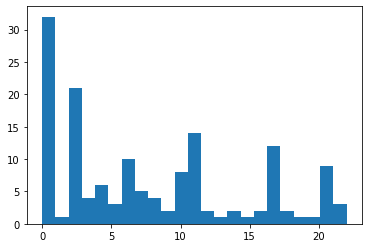

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(km.labels_, bins=k)
plt.show()

In [ ]:
cluster_assignments_dict = {}

for i in set(km.labels_):
    #print i
    current_cluster_comps = [list(company_dict.keys())[x] for x in np.where(km.labels_ == i)[0]]
    cluster_assignments_dict[i] = current_cluster_comps

In [ ]:
cluster_pick = np.random.choice(len(set(km.labels_)))
print('Cluster {0}'.format(cluster_pick))
cluster_assignments_dict[cluster_pick]

Cluster 10


['bcapgroup',
 'bizongo',
 'blog',
 'capital-match',
 'extraordinaryre',
 'loanstartechnologies',
 'mswipe',
 'xingyungroup']

In [ ]:
def clean_dict(raw_dict):
    """
    Function to clean bill text to keep only letters and remove stopwords
    Returns a string of the cleaned bill text
    """
    letters_only = re.sub('[^a-zA-Z]', ' ', raw_dict)
    words = letters_only.lower().split()
    stopwords_eng = set(stopwords.words("english"))
    # stopwords_updated = stopwords_eng.add(u'united')
    # stopwords_updated = stopwords_eng.add(u'states')
    useful_words = [x for x in words if not x in stopwords_eng]
    
    # Combine words into a paragraph again
    useful_words_string = ' '.join(useful_words)
    return(useful_words_string)

In [ ]:
from nltk.corpus import stopwords
cluster_themes_dict = {}

for key in cluster_assignments_dict.keys():
    current_tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
    current_tfs = current_tfidf.fit_transform(map(clean_dict, cluster_assignments_dict[key]))
    
    current_tf_idfs = dict(zip(current_tfidf.get_feature_names(), current_tfidf.idf_))
    tf_idfs_tuples = current_tf_idfs.items()
    cluster_themes_dict[key] = sorted(tf_idfs_tuples, key = lambda x: x[1])[:5]   

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [ ]:
print('Cluster 27 key words: {0}'.format([x[0] for x in cluster_themes_dict[7]]))
print('Cluster 41 key words: {0}'.format([x[0] for x in cluster_themes_dict[2]]))

Cluster 27 key words: ['fabric', 'facebook', 'ownbackup', 'perblu', 'plexium']
Cluster 41 key words: ['bird', 'bitsbox', 'bounceshar', 'branch', 'gleancompani']


In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [ ]:
k = 23
tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfs)

In [ ]:
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 146 samples in 0.000s...
[t-SNE] Computed neighbors for 146 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 146 / 146
[t-SNE] Mean sigma: 0.366535
[t-SNE] Computed conditional probabilities in 0.018s
[t-SNE] Iteration 50: error = 53.3662720, gradient norm = 0.5810213 (50 iterations in 0.129s)
[t-SNE] Iteration 100: error = 51.4338074, gradient norm = 0.5341962 (50 iterations in 0.051s)
[t-SNE] Iteration 150: error = 50.8284607, gradient norm = 0.5713578 (50 iterations in 0.059s)
[t-SNE] Iteration 200: error = 52.4590874, gradient norm = 0.5606359 (50 iterations in 0.043s)
[t-SNE] Iteration 250: error = 50.9220505, gradient norm = 0.5549067 (50 iterations in 0.044s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.922050
[t-SNE] Iteration 300: error = 0.3443776, gradient norm = 0.0113555 (50 iterations in 0.044s)
[t-SNE] Iteration 350: error = 0.2831095, gradient norm = 0.0045032 

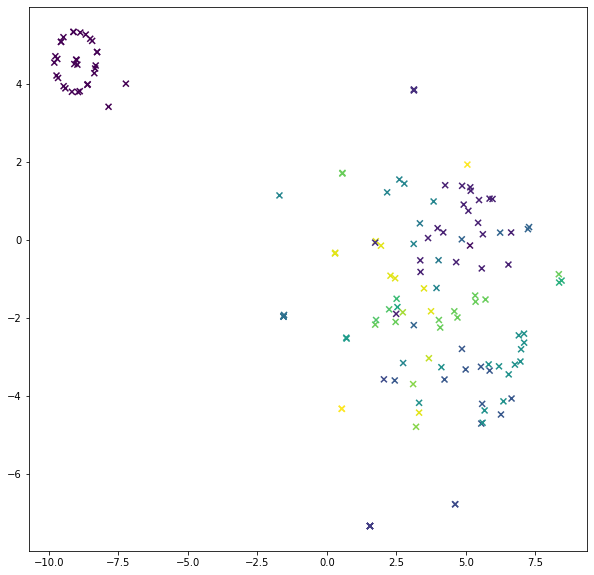

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = km.labels_)

# for i, txt in enumerate(km.labels_):
#     label = str(list(cluster_assignments_dict.values())[txt])
#     ax.annotate(label, (tfs_embedded[:, 0][i], tfs_embedded[:, 1][i]))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

with open('/content/drive/MyDrive/Woof/output_files/db.json', 'r') as file:
  db = json.load(file)

texts_list = []
for key in db.keys():
  texts_list.append(db[key]['text'])

# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)
# print labels

X = tf_idf_matrix.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    print(instance, index, labels[index])
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
abc = {'a':1, 'b':2, 'c':3}
bcd = {'b':3, 'c':3, 'd':4}
abc.extend({'c': 4})
abc

AttributeError: ignored

In [ ]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
# compressed.iloc[0] = pd.Series(compressed.iloc[0]).fillna(method='ffill')
# db = pd.read_excel('/content/drive/MyDrive/Woof/database.xlsx').to_dict()
# db['company'].update(org_dict)

org_df = pd.DataFrame.from_dict(org_dict, orient='index')
org_df.to_excel('/content/drive/MyDrive/Woof/' + "orgdict.xlsx")
db = pd.read_excel('/content/drive/MyDrive/Woof/orgdict.xlsx').to_dict('records')
db


[{'Unnamed: 0': 'amolytpharma',
  'links': 'N/A - Webpage Inaccessible,https://amolytpharma.com,https://amolytpharma.com/,https://amolytpharma.com/2021/09/16/amolyt-pharma-announces-80-million-series-b-financing-led-by-sectoral-asset-management-and-andera-partners/,https://amolytpharma.com/2021/09/21/amolyt-pharma-to-present-phase-1-clinical-trial-data-for-lead-product-candidate-azp-3601-at-the-american-society-for-bone-and-mineral-research-2021-annual-meeting/,https://amolytpharma.com/2021/10/01/amolyt-pharma-announces-positive-data-from-phase-1-trial-of-azp-3601-at-the-american-society-for-bone-and-mineral-research-2021-annual-meeting/,https://amolytpharma.com/about-us/,https://amolytpharma.com/careers/,https://amolytpharma.com/contact-us/,https://amolytpharma.com/cookies-policy/,https://amolytpharma.com/legal-notice/,https://amolytpharma.com/news/,https://amolytpharma.com/patients/,https://amolytpharma.com/privacy-policy/,https://amolytpharma.com/programs/,https://amolytpharma.com/p

In [ ]:
import json
# with open('/content/drive/MyDrive/Woof/db.json','w') as file:
#          json.dump(db, file, sort_keys=True, indent=4)

In [ ]:
with open('/content/drive/MyDrive/Woof/db.json', 'r') as file:
        db = json.load(file)
db

{'amolytpharma': {'links': 'N/A - Webpage Inaccessible,https://amolytpharma.com,https://amolytpharma.com/,https://amolytpharma.com/2021/09/16/amolyt-pharma-announces-80-million-series-b-financing-led-by-sectoral-asset-management-and-andera-partners/,https://amolytpharma.com/2021/09/21/amolyt-pharma-to-present-phase-1-clinical-trial-data-for-lead-product-candidate-azp-3601-at-the-american-society-for-bone-and-mineral-research-2021-annual-meeting/,https://amolytpharma.com/2021/10/01/amolyt-pharma-announces-positive-data-from-phase-1-trial-of-azp-3601-at-the-american-society-for-bone-and-mineral-research-2021-annual-meeting/,https://amolytpharma.com/about-us/,https://amolytpharma.com/careers/,https://amolytpharma.com/contact-us/,https://amolytpharma.com/cookies-policy/,https://amolytpharma.com/legal-notice/,https://amolytpharma.com/news/,https://amolytpharma.com/patients/,https://amolytpharma.com/privacy-policy/,https://amolytpharma.com/programs/,https://amolytpharma.com/programs/azp-3404

In [ ]:
compressed = pd.DataFrame.from_dict({i: dict_test[i] for i in dict_test.keys()}, orient='index')
# compressed_i = pd.Series(range(len(compressed)))
# compressed = compressed.set_index(compressed_i)
# compressed = compressed.reset_index()
compressed.index.name = 'company'
compressed = compressed.set_index(['url'])
compressed.to_excel('/content/drive/MyDrive/Woof/' + output + "_compressed.xlsx")
compressed

NameError: ignored

In [ ]:
# compressed = pd.DataFrame.from_dict({(i,j): org_dicts[i][j] for i in org_dicts.keys() for j in org_dicts[i].keys()}, orient='index')
df = pd.read_excel('/content/drive/MyDrive/Woof/database.xlsx')
df.head(25)

,Unnamed: 0,company,url,profile,links,text,index
0,0,amolytpharma,atemcap,innovator,https://amolytpharma.com/wp-content/uploads/20...,PDF obj Metadata R ViewerPreferences R endobj ...,NaN
1,1,ir,atemcap,innovator,"N/A - Webpage Inaccessible,N/A - Webpage Inacc...","N/A - Webpage Inaccessible,N/A - Webpage Inacc...",NaN
2,2,iridia,atemcap,innovator,"http://iridia.com/about/,http://iridia.com/tea...",About Iridia Skip to content info iridia com S...,NaN
3,3,facebook,atemcap,innovator,"https://www.facebook.com/privacy/explanation,h...",Facebook Jump toSections of this pageAccessibi...,NaN
4,4,syndax,atemcap,innovator,"https://syndax.com/about/,https://syndax.com/t...",About Us Syndax Home About Us Back About Us Le...,NaN
5,5,atemcap,atemcap,investor,"https://www.atemcap.com/,https://www.atemcap.c...",ATEM Capital Why Life Sciences Strategy Leader...,NaN
6,6,info@iridia,atemcap,innovator,N/A - Webpage Inaccessible,N/A - Webpage Inaccessible,NaN
7,7,NaN,nexusvp,investor,"https://nexusvp.com/,https://nexusvp.com/about...",About Nexus Venture Partners top booter best i...,nexusvp
8,8,NaN,nexusvp,innovator,N/A - Webpage Inaccessible,N/A - Webpage Inaccessible,plans@nexusvp
9,9,NaN,nexusvp,innovator,N/A - Webpage Inaccessible,N/A - Webpage Inaccessible,legal


In [ ]:
# df2 = df.copy()
# test_dict = {"company": {'company': 'test', 'url': 'atemcap', 'profile': 'test2', 'links': 'test3', 'text': 'test4'}}
# test_df = pd.DataFrame.from_dict(test_dict, orient="index")
# df2 = pd.concat([df2, test_df])
# df2.reset_index()
df2 = pd.read_excel('/content/drive/MyDrive/Woof/atemcap_kk_compressed.xlsx')
# test_df.head()
df2.head(25)
# print(df.index.union(df2.index))
df = df.merge(df2, how="outer")
# # # df = df.combine_first(df2)
# # # df = df.set_index([index,'url'])
df.head(25)
# # df['url'][df['url'].isin(['leaps'])].empty

,Unnamed: 0,company,url,profile,links,text,index
0,0,amolytpharma,atemcap,innovator,https://amolytpharma.com/wp-content/uploads/20...,PDF obj Metadata R ViewerPreferences R endobj ...,NaN
1,1,ir,atemcap,innovator,"N/A - Webpage Inaccessible,N/A - Webpage Inacc...","N/A - Webpage Inaccessible,N/A - Webpage Inacc...",NaN
2,2,iridia,atemcap,innovator,"http://iridia.com/about/,http://iridia.com/tea...",About Iridia Skip to content info iridia com S...,NaN
3,3,facebook,atemcap,innovator,"https://www.facebook.com/privacy/explanation,h...",Facebook Jump toSections of this pageAccessibi...,NaN
4,4,syndax,atemcap,innovator,"https://syndax.com/about/,https://syndax.com/t...",About Us Syndax Home About Us Back About Us Le...,NaN
5,5,atemcap,atemcap,investor,"https://www.atemcap.com/,https://www.atemcap.c...",ATEM Capital Why Life Sciences Strategy Leader...,NaN
6,6,info@iridia,atemcap,innovator,N/A - Webpage Inaccessible,N/A - Webpage Inaccessible,NaN
7,7,NaN,nexusvp,investor,"https://nexusvp.com/,https://nexusvp.com/about...",About Nexus Venture Partners top booter best i...,nexusvp
8,8,NaN,nexusvp,innovator,N/A - Webpage Inaccessible,N/A - Webpage Inaccessible,plans@nexusvp
9,9,NaN,nexusvp,innovator,N/A - Webpage Inaccessible,N/A - Webpage Inaccessible,legal


In [ ]:
test_dict = {"company": {'company': 'ir', 'url': 'atemcap', 'profile': 'test2', 'links': 'test3', 'text': 'test4'}}
test_df = pd.DataFrame.from_dict(test_dict, orient="index")
df2 = pd.concat([df2, test_df])
# test_df.head()
# df2.head(10)
df = df.merge(df2, how='inner', on=['company', 'url']).set_index(['company', 'url'])

In [ ]:
df.head(10)

profile_x  ...                                               text
company      url                 ...                                                   
amolytpharma atemcap  innovator  ...  PDF obj Metadata R ViewerPreferences R endobj ...
ir           atemcap  innovator  ...  N/A - Webpage Inaccessible,N/A - Webpage Inacc...
             atemcap  innovator  ...                                              test4
             atemcap  innovator  ...                                              test4
             atemcap  innovator  ...  N/A - Webpage Inaccessible,N/A - Webpage Inacc...
             atemcap  innovator  ...                                              test4
             atemcap  innovator  ...                                              test4
iridia       atemcap  innovator  ...  About Iridia Skip to content info iridia com S...
facebook     atemcap  innovator  ...  Facebook Jump toSections of this pageAccessibi...
syndax       atemcap  innovator  ...  About Us Syndax Home About Us Back About Us Le...

[10 rows x 9 columns]

In [ ]:
link = "https://nexusvp.com/portfolio"
try:
  domain = re.search('\www.(.*?)\.', link).group(1)
except:
  try:
    domain = re.search('\//(.*?)\.', link).group(1)
  except:
    domain = "N/A"

domain

'nexusvp'

When to code is complete, you will see that the play button in the above cell stop spinning and line that says "Finished, Running Time:  XXXX" will be displayed. Now head to the shared drive and analyze your output files!

Shared drive: https://drive.google.com/drive/folders/1K936qLncCpC1MK3qzobEaqo4WAC3VPDK?usp=sharing

In [ ]:
orgDicts['atemcap_kk']['amolytpharma']

{'links': ['https://amolytpharma.com/privacy-policy/',
  'https://amolytpharma.com/patients/',
  'https://amolytpharma.com/cookies-policy/',
  'https://amolytpharma.com/programs/',
  'https://amolytpharma.com/programs/azp-3404/',
  'https://amolytpharma.com/2021/09/21/amolyt-pharma-to-present-phase-1-clinical-trial-data-for-lead-product-candidate-azp-3601-at-the-american-society-for-bone-and-mineral-research-2021-annual-meeting/',
  'https://amolytpharma.com/programs/azp-3813-acromegaly/',
  'https://amolytpharma.com/terms-and-conditions/',
  'https://amolytpharma.com/careers/',
  'https://amolytpharma.com/programs/azp-3601-hypoparathyroidism/',
  'https://amolytpharma.com/about-us/',
  'https://amolytpharma.com/legal-notice/',
  'https://amolytpharma.com/',
  'https://amolytpharma.com/contact-us/',
  'https://amolytpharma.com/2021/10/01/amolyt-pharma-announces-positive-data-from-phase-1-trial-of-azp-3601-at-the-american-society-for-bone-and-mineral-research-2021-annual-meeting/',
  'h

In [ ]:
from top2vec import Top2Vec

corpus = [final["text"][i] for i in range(len(final))]
model = Top2Vec(documents=corpus, speed="learn", workers=8)

2021-10-10 13:02:52,419 - top2vec - INFO - Pre-processing documents for training
2021-10-10 13:02:53,669 - top2vec - INFO - Creating joint document/word embedding
2021-10-10 13:03:30,367 - top2vec - INFO - Creating lower dimension embedding of documents
2021-10-10 13:03:33,978 - top2vec - INFO - Finding dense areas of documents
2021-10-10 13:03:33,994 - top2vec - INFO - Finding topics


[array(['opportunities', 'are', 'more', 'work', 'follow', 'join', 'become',
       'complex', 'diseases', 'among', 'our', 'lead', 'deep', 'way',
       'discovery', 'what', 'medicines', 'could', 'open', 'develop',
       'used', 'change', 'next', 'new', 'programs', 'team', 'drug', 'lab',
       'world', 'and', 'better', 'scientists', 'the', 'potential',
       'first', 'challenges', 'looking', 'tools', 'experts', 'current',
       'approach', 'grow', 'contact', 'lives', 'technology', 'platform',
       'expertise', 'opportunity', 'working', 'farmers'], dtype='<U13'), array(['egenesisbio', 'organs', 'egenesis', 'tissues', 'organ', 'crisis',
       'cambridge', 'editing', 'safe', 'office', 'york', 'genome',
       'committed', 'times', 'suite', 'floor', 'sq', 'gene', 'effective',
       'design', 'human', 'engineering', 'advisory', 'ly', 'https',
       'cells', 'new', 'web', 'address', 'wp', 'top', 'menu', 'programs',
       'details', 'info', 'however', 'crispr', 'technology', 'biotech

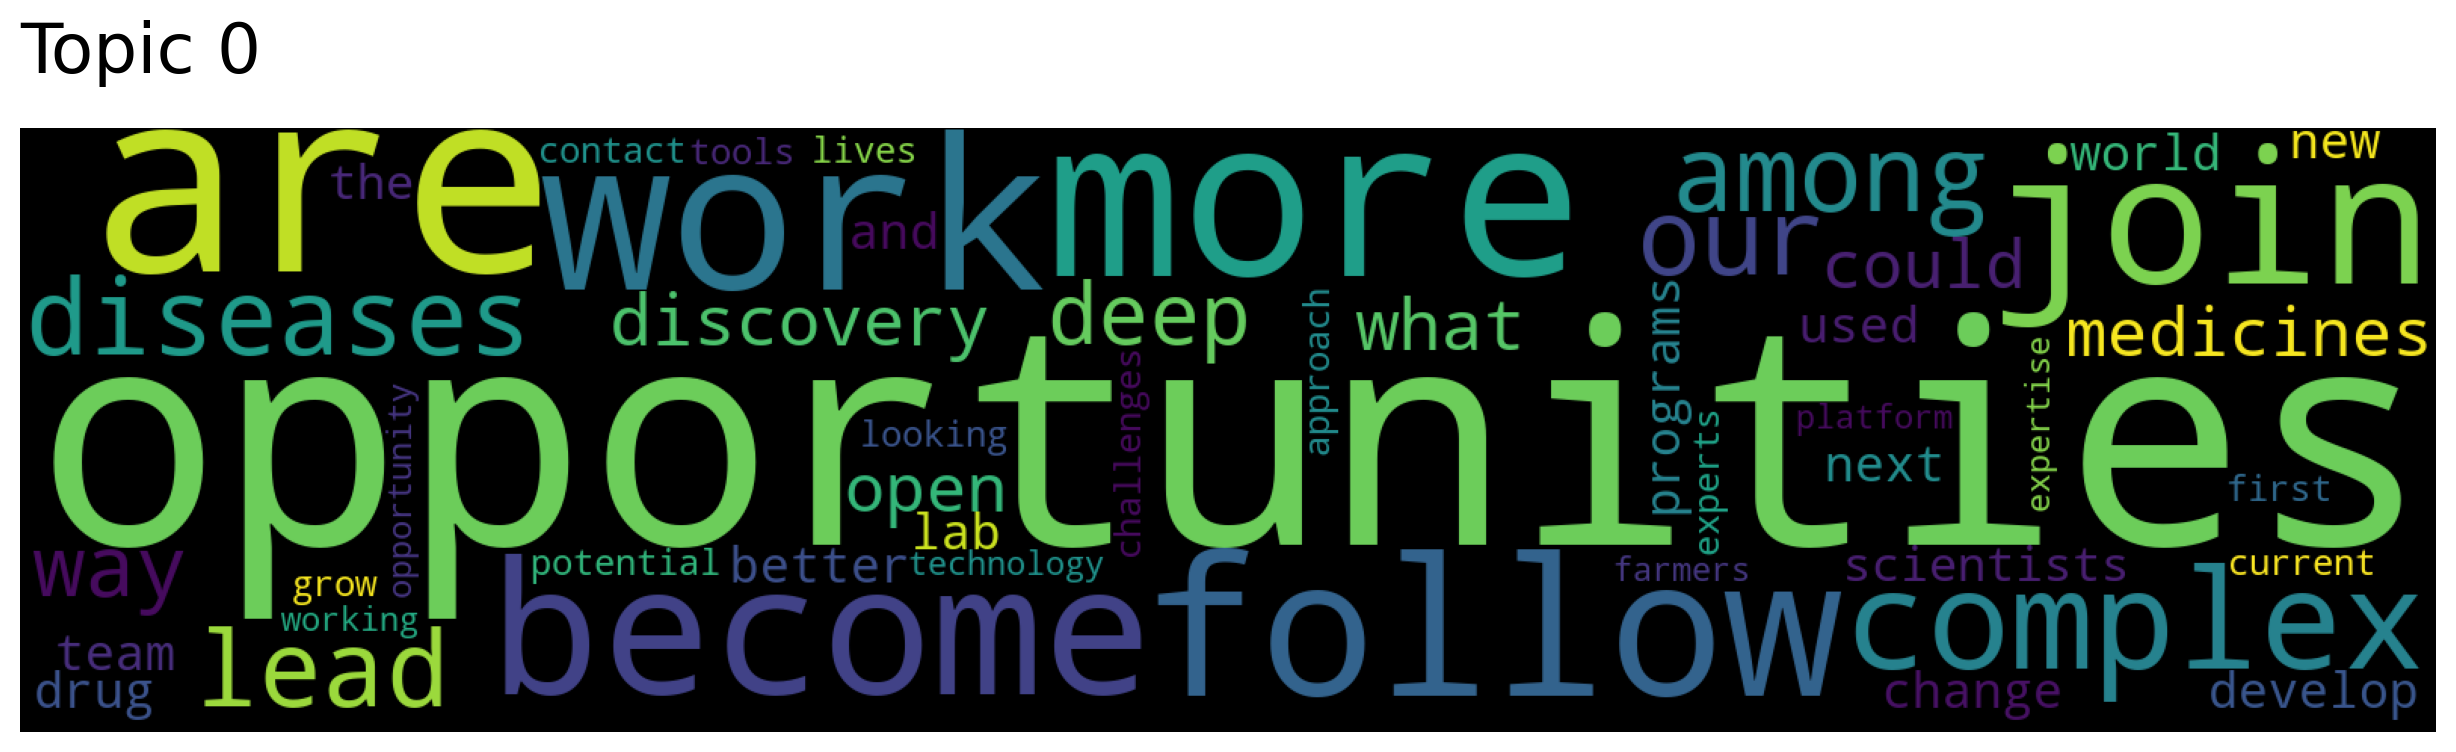

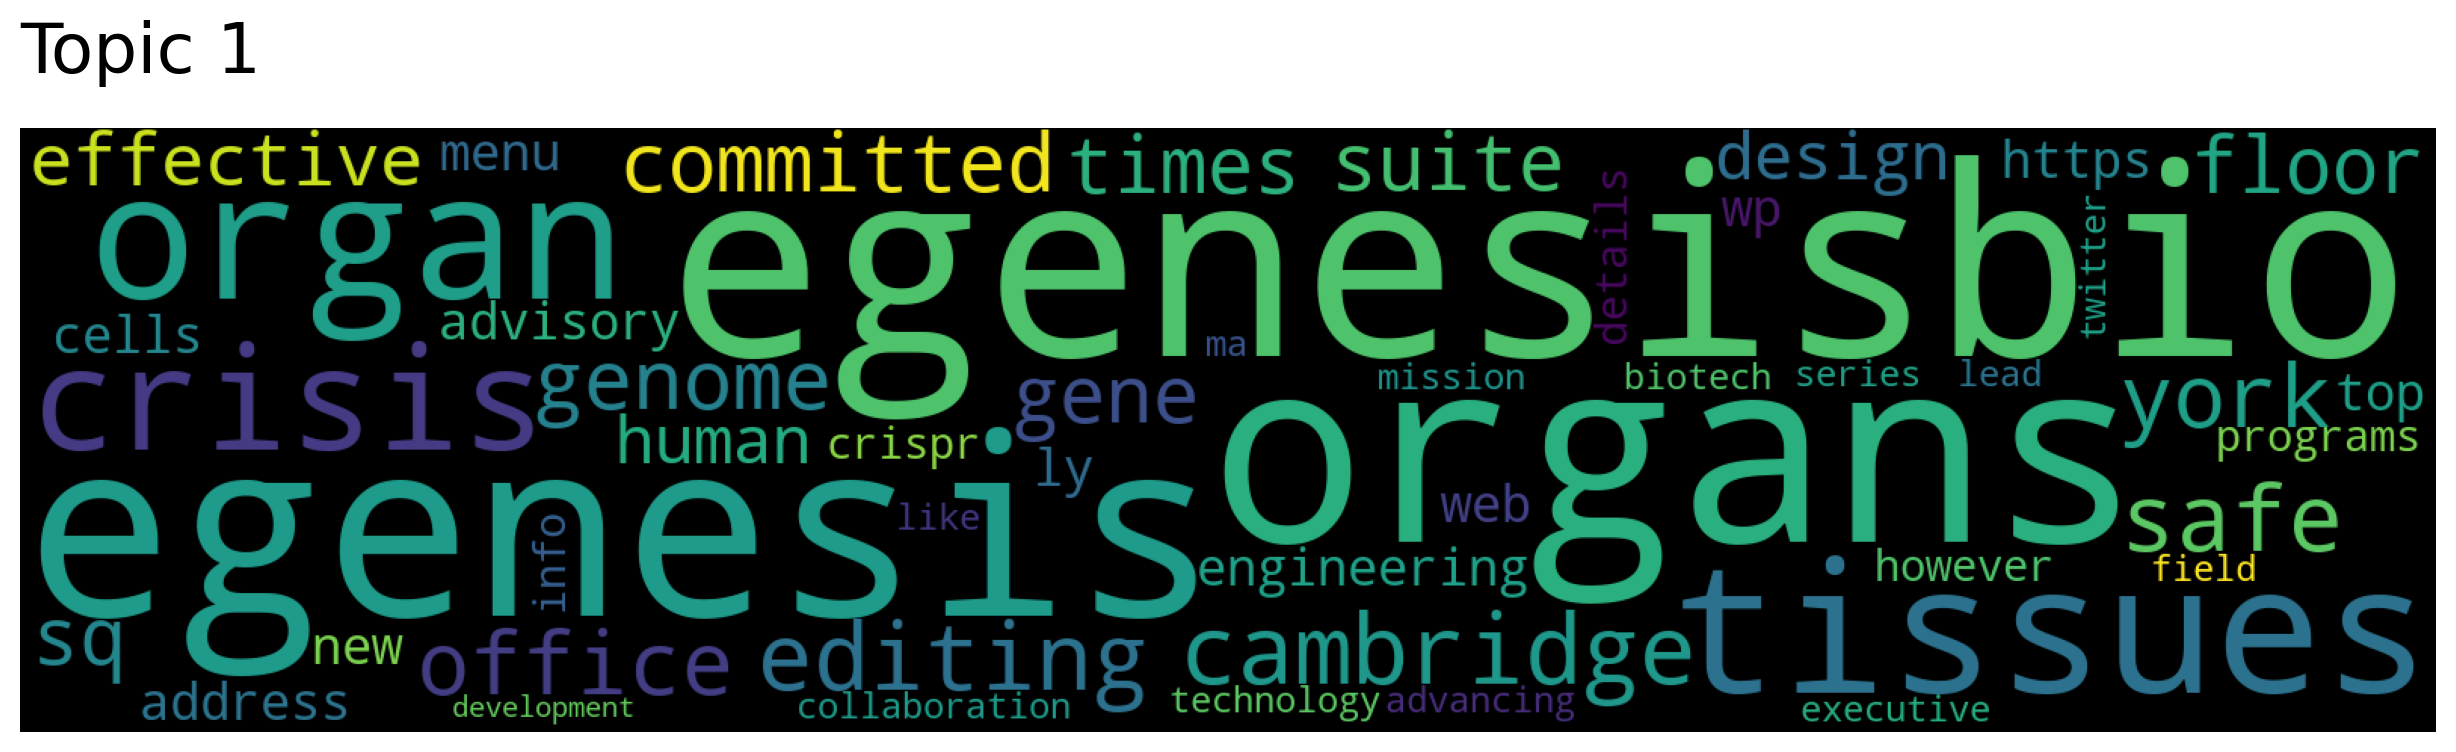

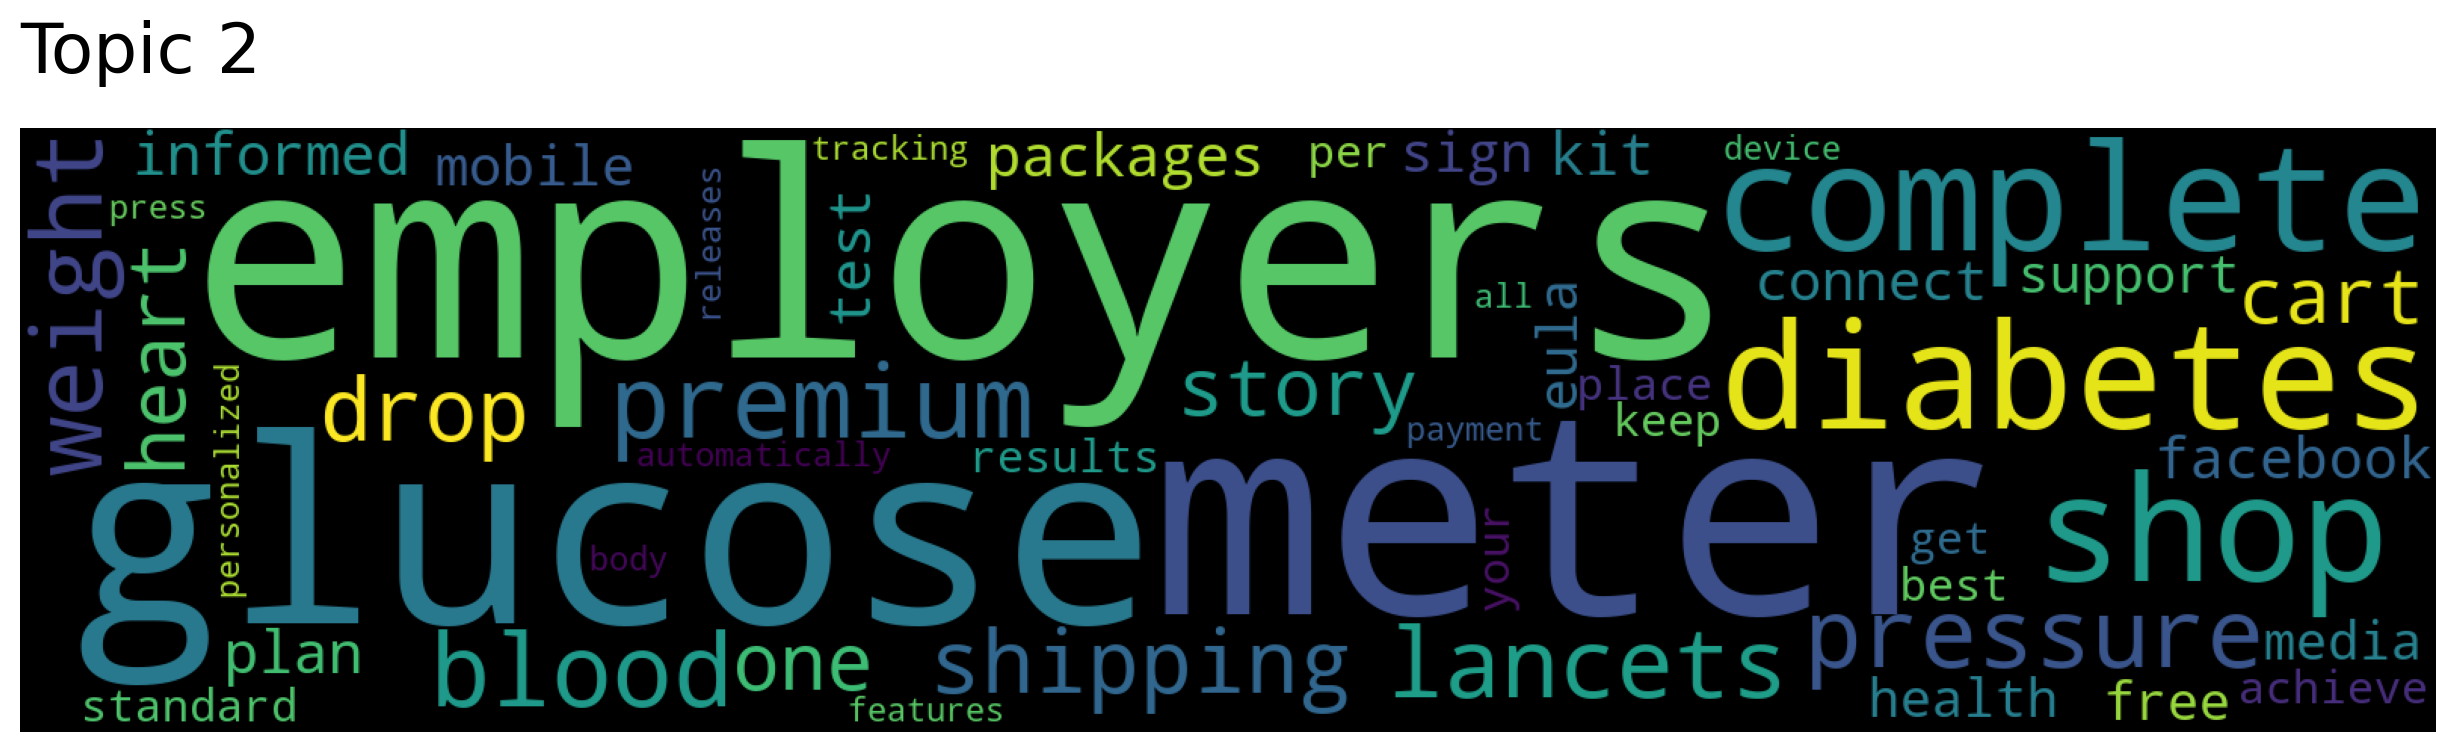

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=3)
print(topic_words)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
bio = []
for i in range(len(final)):
  if final['bio text'][i] != "":
    words = final['bio text'][i].split(',')
    for word in words:
      bio.append(word)
bio = np.unique(bio)
bio

array(['abiraterone', 'allogenic', 'amyloids', 'auristatin', 'axitinib',
       'azospirillum', 'benthamiana', 'biobank', 'biodistribution',
       'biotherapeutics', 'bispecific', 'bromodomain', 'bxh',
       'cardiometabolic', 'cardiotoxicity', 'chemogenomics', 'cleavable',
       'corticobasal', 'crizotinib', 'crowdsourced', 'cyberbullying',
       'dasatinib', 'deacetylases', 'degrader', 'degraders', 'degradome',
       'deubiquitinating', 'druggable', 'dysbiosis', 'endophyte',
       'enzalutamide', 'eribulin', 'erucic', 'exosomes', 'filaggrin',
       'flz', 'fulvestrant', 'fusogenic', 'glypican', 'herbicidal', 'hsy',
       'ibrutinib', 'ihh', 'immunodeficiencies', 'immunome',
       'immunomodulators', 'immunosenescence', 'immunostimulatory',
       'immunotherapeutic', 'immunotherapies', 'immunotype',
       'inflammasome', 'interoceptive', 'interseed', 'keratinization',
       'keratins', 'membraneless', 'metagenome', 'metagenomics',
       'metaregression', 'metastasizing', 

In [ ]:
def orgDict(db_dict, text, link, domain, profile):
  if domain != "N/A":
    if domain not in db_dict.keys():
      db_dict[domain] = {'profile': profile, 'links': [link], 'text': [text]}
    else:
      db_dict[domain]['links'].append(link)
      db_dict[domain]['text'].append(text)
  else:
    if domain not in db_dict.keys():
      db_dict[link] = {'profile': profile, 'links': [link], 'text': [text]}
    else:
      db_dict[link]['links'].append(link)
      db_dict[domain]['text'].append(text)
  return db_dict

In [ ]:
text_tokens, text_stems, text_lemma = textStemmer(compressed_dict['onedrop'][0])
common_text_path = "/content/drive/MyDrive/Woof/common_vocab.txt"
common_text = pathText(common_text_path)
common_stems, common_lemma, common_tokens = textStemmer(common_text)
rare_tokens = list(set(text_stems).difference(set(common_stems[:1000])))
np.unique(rare_tokens)

array(['A', 'About', 'AboutOne', 'All', 'Also', 'At', 'Available', 'Blog',
       'Blood', 'CEO', 'Careers', 'Cart', 'CitySectionReimagine',
       'Coaches', 'Community', 'Complete', 'Dachis', 'Data', 'Diabetes',
       'Drop', 'EULA', 'Employers', 'Evidence', 'Facebook', 'For',
       'Founded', 'Founder', 'Glucose', 'HOME', 'Headquartered', 'Health',
       'Heart', 'I', 'In', 'Inc', 'Informed', 'Instagram', 'Jeff', 'Kit',
       'Lancets', 'Media', 'Meter', 'Mobile', 'New', 'One', 'Our',
       'Packages', 'Payment', 'Policy', 'Premium', 'Press', 'Pressure',
       'Privacy', 'Read', 'Releases', 'Results', 'Rewards', 'Shipping',
       'Shop', 'Sign', 'Skip', 'Story', 'Strips', 'Supplies', 'Support',
       'Systems', 'Test', 'The', 'Twitter', 'Us', 'We', 'Weight', 'York',
       'You', 'YouTube', 'Your', 'accessible', 'affordable', 'app',
       'behavioral', 'brings', 'chronic', 'clinically', 'computing',
       'condition', 'confident', 'delivering', 'destiny', 'diabetes',
     

In [ ]:
##citation black - TODO
@article{angelov2020top2vec,
      title={Top2Vec: Distributed Representations of Topics}, 
      author={Dimo Angelov},
      year={2020},
      eprint={2008.09470},
      archivePrefix={arXiv},
      primaryClass={cs.CL}
}

@article{angelov2020top2vec,
      title={Top2Vec: Distributed Representations of Topics}, 
      author={Dimo Angelov},
      year={2020},
      eprint={2008.09470},
      archivePrefix={arXiv},
      primaryClass={cs.CL}
}

In [ ]:
from urllib.request import Request, urlopen
html = urlopen("https://vineti.com/", timeout=10).read()


HTTPError: ignored

In [ ]:
    # final = pd.DataFrame.from_dict(link_data, orient='index', columns=['db_dict', 'profile', 'text', 'rare', 'bio text', 'keywords', 'places', 'locations', 'org'])
    # # final = pd.DataFrame.from_dict(link_data, orient='index', columns=['db_dict', 'link', 'text', 'rare', 'bio text', 'keywords', "locations"])
    # final.to_excel('/content/drive/MyDrive/Woof/' + out_file)
 
    # location_df = pd.DataFrame(all_locations, columns = ["Link", "Location"])
    # locator = geopy.geocoders.Nominatim(user_agent="mygeocoder", timeout=10)
    # geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
    # location_df["address"] = location_df["Location"].apply(geocode)
    
    # location_df["coordinates"] = location_df["address"].apply(lambda loc: tuple(loc.point) if loc else (None, None, None))
    # location_df[["latitude", "longitude", "altitude"]] = pd.DataFrame(list(location_df["coordinates"]), index=location_df.index)
    # location_df.latitude.isnull().sum()
    # location_df = location_df[pd.notnull(location_df["latitude"])]
 
    # map = folium.Map(location=[59.338315,18.089960], zoom_start=2, tiles="CartoDB dark_matter")
    # FastMarkerCluster(data=list(zip(location_df["latitude"].values, location_df["longitude"].values))).add_to(map)
    # folium.LayerControl().add_to(map)
    # map

In [ ]:
    # common_text_path = "/content/drive/MyDrive/Woof/common_vocab.txt"
    # common_text = pathText(common_text_path)
    # common_stems, common_lemma, common_tokens = textStemmer(common_text)
    # common_df = pd.DataFrame(data={'common': list(common_stems)})
    # common_df.to_csv('/content/drive/MyDrive/Woof/' + "common_stems.xlsx")
    common_stems_df  = pd.read_csv("/content/drive/MyDrive/Woof/common_stems.xlsx")
    common_stems = common_stems_df['common'].to_list()[0:common]

    # bio_text_path = "/content/drive/MyDrive/Woof/bio_vocab.txt"
    # bio_text = pathText(bio_text_path)
    # bio_stems, bio_lemma, bio_tokens = textStemmer(bio_text)
    # bio_stems = set(bio_stems).difference(set(common_stems))
    # bio_df = pd.DataFrame(data={'bio': list(bio_stems)})
    # bio_df.to_csv('/content/drive/MyDrive/Woof/' + "bio_stems.xlsx")
    bio_stems_df  = pd.read_csv("/content/drive/MyDrive/Woof/bio_stems.xlsx")
    bio_stems = bio_stems_df['bio'].to_list()

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
# import sys
# _ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))
# !pip install top2vec[sentence_encoders] --quiet
# !pip install top2vec[sentence_transformers] --quiet
# !pip install top2vec[indexing] --quiet
# !pip install geopandas
!python -m spacy download en_core_web_md

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.parse import urlparse, urljoin
import requests
from socket import timeout
from tqdm.notebook import tqdm_notebook
import re
import sys
import time
import os
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import json
import matplotlib.pyplot as plt

In [ ]:
#@title Inputs { display-mode: "form" }
urls = ["https://atemcap.com", "https://nexusvp.com/portfolio/"] #@param {type:"raw"}
link_search_types = ["ie", "ie"] #@param {type:"raw"}
output_filenames = ["atemcap", "nexusvp"] #@param {type:"raw"}
keyword_search = ['breast', 'cancer', 'diagnostic'] #@param {type:"raw"}
profiles =  ["investor", "investor"]#@param {type:"raw"}
common = 10000

nlp_wk = spacy.load("en_core_web_md")

def pathText(path):
    stmr = PorterStemmer()
    text = open(path, "r").read()
    text = re.sub("[^a-zA-z]"," ", text)

    return text

def textStemmer(text):
    stmr = PorterStemmer()
    text_tokens = word_tokenize(text)

    text_stems = []
    [text_stems.append(stmr.stem(word)) for word in text_tokens]
    text_stems = np.unique(text_tokens)

    text_lemma = []
    [text_lemma.append(lemmatizer.lemmatize(word, pos='n')) for word in text_tokens]
    text_lemma = np.unique(text_tokens)

    return text_tokens, text_stems, text_lemma

def urlText(url):
    html = urlopen(url, timeout=10).read()
    soup = BeautifulSoup(html, features="html.parser")
 
    for script in soup(["script", "style"]):
        script.extract()
 
    text = soup.get_text()
    text = re.sub("[^a-zA-z]"," ", text)

    return text
  
def isValid(url):
    parsed = urlparse(url)

    return bool(parsed.netloc) and bool(parsed.scheme)
 
def linksBuilder(url, searcher, bar):
    soup = BeautifulSoup(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).content, "html.parser")
    urlf = set()
    domain_name = urlparse(url).netloc
    for link in soup.findAll('a'):
        href = link.attrs.get("href")
        if href == "" or href is None:
            continue
        href = urljoin(url, href)
        parsed_href = urlparse(href)
        href = parsed_href.scheme + "://" + parsed_href.netloc + parsed_href.path
        if isValid(href):
            if domain_name not in href:
                if href not in external_urls:
                    external_urls.add(href)
                    if searcher == "iei" and isValid(href):
                        try: 
                            urlopen(href)
                            external_urls.update(linksBuilder(href, "i", bar))
                        except:
                            pass
            else:
                if href not in internal_urls:
                    internal_urls.add(href)
        bar.update(1)
    urlf.update(internal_urls)
    if searcher == "e" or searcher =="ie":
        urlf.update(external_urls)

    return urlf

def sentenceStmr(url, common_stems, keyword_stems):
    stmr = PorterStemmer()
    tokens, stems, lemma = textStemmer(urlText(url))
    keywords = []
    sentences = " ".join(tokens)
    rare_stems = list(set(stems).difference(set(common_stems)))
    key_stems = list(set(stems).intersection(set(keyword_stems)))
    return sentences, stems, rare_stems, key_stems

def dbDict(db_dict, text, link, domain, profile, url_domain, stem_count):
  if domain != "N/A":
    if domain not in db_dict.keys():
      db_dict[domain] = {'url': url_domain, 'profile': profile, 'links': [link], 'text': [text], 'stems': stem_count}
      # stems[domain] = stem_count    
    else:
      db_dict[domain]['links'].append(link)
      db_dict[domain]['text'].append(text)
      # stems[domain] = {k: stem_count.get(k, 0) + stems[domain].get(k, 0) for k in stem_count.keys() | stems[domain].keys()}
      db_dict[domain]['stems'] = {k: stem_count.get(k, 0) + db_dict[domain]['stems'].get(k, 0) for k in stem_count.keys() | db_dict[domain]['stems'].keys()}
  else:
    if domain not in db_dict.keys():
      db_dict[link] = {'url': url_domain, 'profile': profile, 'links': [link], 'text': [text], 'stems': stem_count}
      # stems[link] = stem_count
    else:
      db_dict[link]['links'].append(link)
      db_dict[link]['text'].append(text)
      db_dict[link]['stems'] = {k: stem_count.get(k, 0) + db_dict[link]['stems'].get(k, 0) for k in stem_count.keys() | db_dict[link]['stems'].keys()}
      # stems[link] = {k: stem_count.get(k, 0) + stems[link].get(k, 0) for k in stem_count.keys() | stems[link].keys()}
  return db_dict

def main(url,profile,common,searcher,out_file,keyword_search):
    start_time = time.time()

    common_stems_df  = pd.read_csv("/content/drive/MyDrive/Woof/common_stems.xlsx")
    common_stems = common_stems_df['common'].to_list()[0:common]

    bio_stems_df  = pd.read_csv("/content/drive/MyDrive/Woof/bio_stems.xlsx")
    bio_stems = bio_stems_df['bio'].to_list()

    keyword_stems = []
    keyword_lemma = []
    if keyword_search != []:
        [keyword_stems.append(stmr.stem(word)) for word in keyword_search]
        [keyword_lemma.append(lemmatizer.lemmatize(word)) for word in keyword_search]

    bar = tqdm_notebook(total=200, desc = "Building Links...")
    links = list(linksBuilder(url, "iei", bar))
      
    # link_data = {}
    stem_dict = {}
    db_dict = {}
    all_locations = []
    for link in tqdm_notebook(links, desc = "Extracting Text..."):
        try:
          domain = re.search('\www.(.*?)\.', link).group(1)
        except:
          try:
            domain = re.search('\//(.*?)\.', link).group(1)
          except:
            domain = "N/A"

        profile = "Unknown"
        if domain != url_domain:
            if url_domain == "investor":
              profile = "innovator"
            else:
              profile = "innovator"
        else:
            profile = "investor"

        # locations = []
        # places = []
        # org = []
        # bio_tags = []

        try:
          text, stems, rare_stems, key_stems = sentenceStmr(link, common_stems, keyword_stems)
          stem_count = dict()
          for i in stems:
            stem_count[i.lower()] = stem_count.get(i.lower(), 0) + 1
          db_dict = dbDict(db_dict, text, link, domain, profile, url_domain, stem_count)
          # bio_tags = list(set(stems).intersection(set(bio_stems)))
          # doc = nlp_wk(text)
          # locations.extend([ent.text for ent in doc.ents if ent.label_ in ["LOC"]])
          # places.extend([ent.text for ent in doc.ents if ent.label_ in ["GPE"]])
          # org.extend([ent.text for ent in doc.ents if ent.label_ in ["ORG"]])
          # all_locations.extend([[link, ent.text] for ent in doc.ents if ent.label_ in ["LOC"]])
          # link_data[link] = [domain, profile, text, ",".join(np.unique(rare_stems)), ",".join(np.unique(bio_tags)), ",".join(np.unique(key_stems)), ",".join(np.unique(places)), ",".join(np.unique(locations)), ",".join(np.unique(org))]

        except:
          # link_data[link] = [domain, profile, "N/A - Webpage Inaccessible", "N/A - Webpage Inaccessible", "N/A - Webpage Inaccessible", "N/A - Webpage Inaccessible", "N/A - Webpage Inaccessible", "N/A - Webpage Inaccessible", "N/A - Webpage Inaccessible"]
          db_dict = dbDict(db_dict, "N/A - Webpage Inaccessible", "N/A - Webpage Inaccessible", domain, profile, url_domain, {})
          pass

    for db_key in db_dict.keys():
      for key in db_dict[db_key].keys():
        if key == "links" or key == "text":
          db_dict[db_key][key] = ",".join(np.unique(db_dict[db_key][key]))
    
    run_time = time.time() - start_time
    
    print("Finished, Running Time: ", run_time)

    return db_dict

outputs = {}
with open('/content/drive/MyDrive/Woof/db.json', 'r') as file:
  db = json.load(file)
# db = {}

for i, output in tqdm_notebook(enumerate(output_filenames), desc="Searching Inputs..."):
  internal_urls = set()
  external_urls = set()
  try:
      url_domain = re.search('\www.(.*?)\.', urls[i]).group(1)
  except:
      try:
        url_domain = re.search('\//(.*?)\.', urls[i]).group(1)
      except:
        url_domain = "N/A"

  db_urls = [db[k]['url'] for k in db.keys()]
  if url_domain in db_urls:
    action = input (url_domain + " exists in database, would you like to skip? (y/n): ")
    if action == "y":
      continue

  db_dict = main(urls[i],profiles[i],common,link_search_types[i],output_filenames[i],keyword_search)
  db.update(db_dict)

with open('/content/drive/MyDrive/Woof/db.json','w') as file:
  json.dump(db, file, sort_keys=True, indent=4)